In [1]:
from __future__ import print_function

%matplotlib inline

import os
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib2tikz import get_tikz_code

In [2]:
sns.set(style="ticks")

In [ ]:
hmac = ''
DIRS = ['/Users/gallenmu/mkdir/2018-07-27_20-14-52/rapla']

#hmac = 'hmac_'
#DIRS = ['/Users/gallenmu/mkdir/2018-07-29_18-13-41/rapla']

flatency = []
fthroughput = []


for d in DIRS:
    files = os.listdir(d)
    flatency_ = filter(lambda x: x.startswith('latency'), files)
    flatency.extend(map(lambda x: os.path.join(d, x), flatency_))
    fthroughput_ = filter(lambda x: x.startswith('throughput'), files)
    fthroughput.extend(map(lambda x: os.path.join(d, x), fthroughput_))

In [3]:
hmac = ''
flatency = ['~/dev/ba/ba-okelmann/statistics/aaaa.csv']
fthroughput = []

In [4]:
tikz_header = r"""
\documentclass[beamer,multi=true,preview,tikz]{standalone}

\usepackage[utf8]{inputenc}
\usepackage{tumcolor}
\usepackage{tikz}
%\usepackage{times}
\usepackage{pgfplots}
\pgfplotsset{compat=1.13}

\begin{document}%
"""

tikz_footer = r"""
\end{document}
"""

## Throughput

In [9]:
dfthr = []
for fname in tqdm(fthroughput, ncols=0, desc='Parsing'):
    s = fname.split('.')
    t = s[0].split('/')
    u = t[len(t)-1].split('-')
    for e in u:
        if 'rate' in e:
            rate = int(e.replace('rate', ''))
        elif 'pktsz' in e:
            psize = int(e.replace('pktsz', ''))
                
    df = pd.read_csv(fname)       
    df['psize'] = psize
    df['rate'] = rate
    
    dfthr.append(df)
    
#dfthr = pd.concat(dfthr)
dfthr.reset_index(drop=True, inplace=True)

Parsing: 0it [00:00, ?it/s]


AttributeError: 'list' object has no attribute 'reset_index'

In [6]:
dfthr['PacketRate'] = dfthr['PacketRate'].astype(float)
dfthr.head()

TypeError: list indices must be integers or slices, not str

In [7]:
def max_packet_rate_mpps(psize):
    return (10000000000 / ((psize +24) * 8)) / 1000000 

In [8]:
dfthr_ = dfthr.groupby(['psize', 'rate', 'Direction'])['PacketRate'].median().reset_index()
dfthr_ = dfthr.groupby(['psize', 'rate', 'Direction'])['PacketRate'].max().reset_index()
dfthr_ = pd.pivot_table(dfthr_, index=['psize', 'rate'], columns="Direction", values="PacketRate").reset_index()

dfthr_.to_csv("~/dev/ba/ba-okelmann/statistics/throughput_mpps.csv", index=False)


AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
dfg = dfthr_.groupby(['psize'])["RX"].max().reset_index()
print(dfg)

In [ ]:
fig = plt.figure()

xes = []
ys = []

dfg = dfthr_.groupby(['psize'])["RX"].max().reset_index()
print(dfg)
for index, row in dfg.iterrows():
    psize = row['psize']
    rx = row["RX"]
    maxr = max_packet_rate_mpps(psize)
    
    xes.append(psize)
    ys.append(rx/maxr)

fig = plt.figure()

plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.21))

    
plt.ylabel("Relative transfer rate")
plt.xlabel("Packet size (Byte)")
fig.tight_layout()
plt.grid(True)

plt.plot(xes, ys, markersize=10, marker='o', label=psize)
plt.title('Relative transfer rates for different packets sizes')
axes = plt.gca()
axes.set_ylim(ymin=0)
axes.set_ylim(ymax=1.1)

outf = '~/dev/ba/ba-okelmann/statistics/'+hmac+'relative_throughput__all_sizes.tex'.format(psize)
with codecs.open(outf, "w", encoding="utf8") as f:
    f.write(tikz_header)
    f.write(get_tikz_code(outf, show_info=False, figurewidth="12cm", figureheight="7cm"))
    f.write(tikz_footer)


plt.show()
    
print(ys)

In [ ]:
fig = plt.figure()
for psize, dfg in dfthr_.groupby(["psize"]):
    #print(dfg["TX"].tolist())
    
    plt.plot(dfg["TX"].tolist(), dfg["RX"].tolist(), markersize=10, marker='o', label=psize)
    plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.21))

    
    plt.xlabel("Transmitted Framerate (Mpps)")
    plt.ylabel("Received Framerate (Mpps)")
    fig.tight_layout()
    plt.grid(True)
    
    axes = plt.gca()
    axes.set_ylim(ymin=0)
    #axes.set_ylim(ymax=16)
    
    outf = '~/dev/ba/ba-okelmann/statistics/'+hmac+'throughput__{}.tex'.format(psize)
    with codecs.open(outf, "w", encoding="utf8") as f:
        f.write(tikz_header)
        f.write(get_tikz_code(outf, show_info=False, figurewidth="12cm", figureheight="7cm"))
        f.write(tikz_footer)
    
    plt.title('Packet size: {}B'.format(psize))

    plt.show()

## Latency

In [13]:
dflat = []
for fname in tqdm(flatency, ncols=0):
   
    s = fname.split('.')
    t = s[0].split('/')
    u = t[len(t)-1].split('-')
    for e in u:
        if 'rate' in e:
            rate = int(e.replace('rate', ''))
        elif 'pktsz' in e:
            psize = int(e.replace('pktsz', ''))
                
    df = pd.read_csv(fname, names=["latency", "weight"])
    #df['rate'] = rate
    #df['psize'] = psize
      
    dflat.append(df)
    
dflat = pd.concat(dflat)
dflat.reset_index(drop=True, inplace=True)

100% 1/1 [00:00<00:00, 94.39it/s]


In [14]:
dflat.head()

,latency,weight
0,2253120,1
1,2253696,1
2,2254640,1
3,2254696,1
4,2254720,1


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


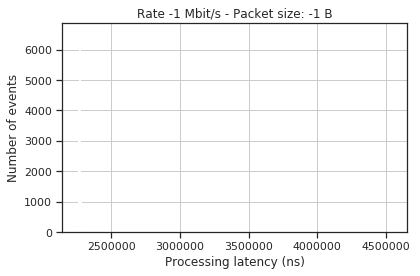

In [42]:
#for (psize, rate), dfg in dflat.groupby(["psize", "rate"]):
    
    #print(rate)
    #print(psize)
    #print(dfg)
    
    #latencies = dfg['latency'].tolist()
    #weights = dfg['weight'].tolist()
    latencies = dflat['latency'].tolist()
    weights = dflat['weight'].tolist()

    rate = -1
    psize = -1
    
    fig = plt.figure()

    plt.hist(latencies, weights=weights, bins=400)
    plt.title('Rate {} Mbit/s - Packet size: {} B'.format(rate, psize))
    #plt.legend(loc=0)
    plt.ylabel("Number of events")
    plt.xlabel("Processing latency (ns)")
    fig.tight_layout()
    plt.grid(True)
    
    outf = '/home/pogobanane/dev/ba/ba-okelmann/statistics/'+hmac+'aaaaaa.tex'
    with codecs.open(outf, "w", encoding="utf8") as f:
        f.write(tikz_header)
        f.write(get_tikz_code(outf, show_info=False, figurewidth="48cm", figureheight="7cm"))
        f.write(tikz_footer)
    
    plt.show()